In [1]:
import numpy as np
import pandas as pd

import hdbscan
from sklearn.manifold import TSNE

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [2]:
distance_matrix_file = '/home/pricear/mps_ws/src/mps_voxels/mps_test_data/2020-06-24T21:04:51.344795/distances.csv'
df = pd.read_csv(distance_matrix_file, sep=',', header=None)
distance_matrix = df.values

In [3]:
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)
print("Clusters:", len(np.unique(clusterer.labels_))-1)

Clusters: 7


In [4]:
embedding = TSNE(n_components=2, metric='precomputed').fit_transform(distance_matrix)

<IPython.core.display.Javascript object>


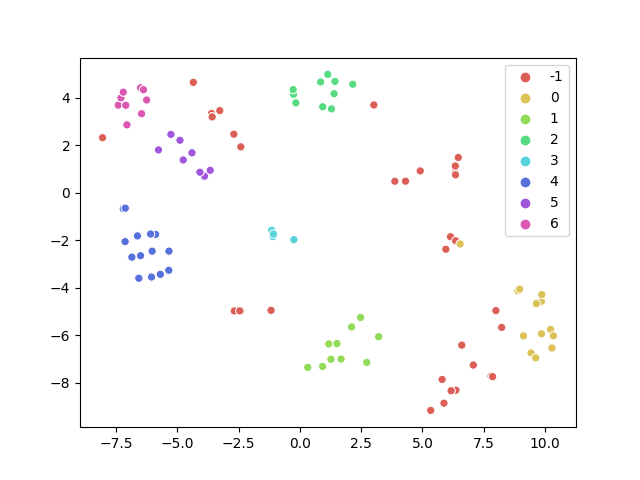

In [5]:
sns.scatterplot(
    x=embedding[:,0],
    y=embedding[:,1],
    hue=clusterer.labels_,
    palette=sns.color_palette("hls", len(np.unique(clusterer.labels_))),
    data=df
)

In [23]:
ids, counts = np.unique(clusterer.labels_, return_counts=True)
print(ids, counts)
for _, label in sorted(zip(counts, ids), reverse=True):
    for x in range(5):
        for y in range(5):
            for z in range(5):
                i = x * 25 + y * 5 + z
                if clusterer.labels_[i] == label:
                    print("rosbag play -d 1 vizparticleMixed_" + str(x) + "_" + str(y) + "_" +  str(z) + ".bag;")
    print("sleep 5;")

[-1  0  1  2  3  4  5  6] [40 14 15 12  6 16 11 11]
rosbag play -d 1 vizparticleMixed_0_1_2.bag;
rosbag play -d 1 vizparticleMixed_0_2_1.bag;
rosbag play -d 1 vizparticleMixed_0_2_2.bag;
rosbag play -d 1 vizparticleMixed_0_2_4.bag;
rosbag play -d 1 vizparticleMixed_0_3_3.bag;
rosbag play -d 1 vizparticleMixed_1_0_1.bag;
rosbag play -d 1 vizparticleMixed_1_1_4.bag;
rosbag play -d 1 vizparticleMixed_1_2_2.bag;
rosbag play -d 1 vizparticleMixed_1_3_1.bag;
rosbag play -d 1 vizparticleMixed_1_3_2.bag;
rosbag play -d 1 vizparticleMixed_2_1_0.bag;
rosbag play -d 1 vizparticleMixed_2_1_1.bag;
rosbag play -d 1 vizparticleMixed_2_1_2.bag;
rosbag play -d 1 vizparticleMixed_2_1_3.bag;
rosbag play -d 1 vizparticleMixed_2_1_4.bag;
rosbag play -d 1 vizparticleMixed_2_3_0.bag;
rosbag play -d 1 vizparticleMixed_2_3_4.bag;
rosbag play -d 1 vizparticleMixed_3_0_4.bag;
rosbag play -d 1 vizparticleMixed_3_1_3.bag;
rosbag play -d 1 vizparticleMixed_3_2_0.bag;
rosbag play -d 1 vizparticleMixed_3_3_0.bag;
ros

In [21]:
print(sorted(zip(counts, ids), reverse=True))

[(40, -1), (16, 4), (15, 1), (14, 0), (12, 2), (11, 6), (11, 5), (6, 3)]
